# Project: AllLife Credit Card Customer Segmentation

# Description

## Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

## Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

## Data Dictionary
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)
 

In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

roundoff = 3

random_state = 42
np.random.seed(random_state)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Format:
pd.options.display.float_format = '{:.4f}'.format

# Understand data

In [2]:
cs_df = pd.read_excel('Credit Card Customer Data.xlsx')
cs_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
cs_df.shape

(660, 7)

<b>Observation:</b>
- 660 rows and 7 features or columns
- Sl_No and Customer_Key can be dropped as it is not needed for model training

In [4]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observation**
- All columns are in integer datatype
- No nulls being observed

In [5]:
cs_df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.0000,660.0000,660.0000,660.0000,660.0000,660.0000,660.0000
mean,330.5000,55141.4439,34574.2424,4.7061,2.4030,2.6061,3.5833
std,190.6699,25627.7722,37625.4878,2.1678,1.6318,2.9357,2.8653
min,1.0000,11265.0000,3000.0000,1.0000,0.0000,0.0000,0.0000
25%,165.7500,33825.2500,10000.0000,3.0000,1.0000,1.0000,1.0000
50%,330.5000,53874.5000,18000.0000,5.0000,2.0000,2.0000,3.0000
75%,495.2500,77202.5000,48000.0000,6.0000,4.0000,4.0000,5.0000
max,660.0000,99843.0000,200000.0000,10.0000,5.0000,15.0000,10.0000


**Observation:**
- We can ignore SL_No and Customer Key columns
- "Avg_Credit_Limit" ranges from 3000 to 200000 which is a huge spread
- "Total_Credit_Cards" ranges from 1 to 10 cards with an avg of ~5 
- "Total_visits_bank" ranges from 0 to 5 times with an avg of ~2 
- "Total_visits_online" ranges from 0 to 15 times with an avg of ~3 
- "Total_calls_made" ranges from 0 to 10 times with an avg of ~4



## Checking for Missing / Null values

In [6]:
#Checking for NUll or NAs
print(cs_df.isnull().sum())
print(cs_df.isna().sum())

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


<b>Observation</b>
- No Null or NA values in the data

## Checking for duplicates

In [7]:
#Checking for duplicates
cs_df[cs_df.duplicated()].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

## Duplicate Customer key with different SL_No

In [8]:
cs_df[cs_df['Customer Key'].duplicated(keep=False)].sort_values('Customer Key',ascending=True)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


<b>Observation</b>
- No duplicates found based on serial number
- Same Customer Key has different SL_no


# Exploratory Data Analysis

In [9]:
#Create a copy of the data
cscopy = cs_df.copy()
df = cs_df.copy()

In [10]:
##Drop unwanted columns
df.drop(['Sl_No','Customer Key'], axis=1, inplace=True)

In [11]:
# Check for unique data in each column:
df.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<b>Observation</b>
- Out of 660 rows of customers:
  - Distinct Abg credit limits : 110 distinct
  - Distinct Total credit cards : 10
  - Distinct Visit bank : 6
  - Distinct Visit online : 16
  - Distinct calls made : 11

## Analyzing customers using different modes of communication

### Mode of communication : Online

In [12]:
## ONLY ONLINE
print(df[(df['Total_calls_made']==0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']!=0)].count())

Avg_Credit_Limit       7
Total_Credit_Cards     7
Total_visits_bank      7
Total_visits_online    7
Total_calls_made       7
dtype: int64


<b>Observation</b>
- Seems 7 customers never contacted bank through calls and visited bank but used only online
- These customer have more number of credit cards and more online visits

### Mode of communication : Visits

In [13]:
## ONLY VISITS
print(df[(df['Total_calls_made']==0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)].count())

Avg_Credit_Limit       30
Total_Credit_Cards     30
Total_visits_bank      30
Total_visits_online    30
Total_calls_made       30
dtype: int64


<b>Observation</b>
- Seems 30 customers  never contacted bank through calls and not used online but visited bank

### Mode of communication : Calls

In [14]:
## ONLY CALLS
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']==0)].count()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<b>Observation</b>
- Seems 0 customers never used bank or visited online have ever contacted through phone

### Mode of communication : None

In [15]:
## NO MODE OF COMMUNICATION
df[(df['Total_calls_made']==0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']==0)].count()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<b>Observation</b>
- 0 customers who never contacted bank via any communication channel

### Mode of communication : Used visits & Online but never phone

In [16]:
## USED VISITS AND ONLINE BUT NEVER PHONE
df[(df['Total_calls_made']==0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       60
Total_Credit_Cards     60
Total_visits_bank      60
Total_visits_online    60
Total_calls_made       60
dtype: int64

<b>Observation</b>
- Seems 60 customers never contacted bank through calls but visited bank and used online

### Mode of communication : Used calls ad Online but never visited

In [17]:
## USED CALLS AND ONLINE BUT NEVER VISITED
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       93
Total_Credit_Cards     93
Total_visits_bank      93
Total_visits_online    93
Total_calls_made       93
dtype: int64

<b>Observation</b>
- Seems 93 customers never visited bank but contacted through calls and used online

### Mode of communication : Used calls and visits but not online

In [18]:
## USED CALLS AND VISITS BUT NOT ONLINE
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)].count()

Avg_Credit_Limit       114
Total_Credit_Cards     114
Total_visits_bank      114
Total_visits_online    114
Total_calls_made       114
dtype: int64

<b>Observation</b>
- Seems 114 customers never used online but contacted bank through calls and visited bank

### Mode of communication : Used all 3 modes of communications

In [19]:
## USED ALL 3 MODES OF COMMUNICATION
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       356
Total_Credit_Cards     356
Total_visits_bank      356
Total_visits_online    356
Total_calls_made       356
dtype: int64

<b>Observation</b>
- Seems 356 customers used all 3 banking options (calls / online / visited)

## Univariate and Bivariate Analysis

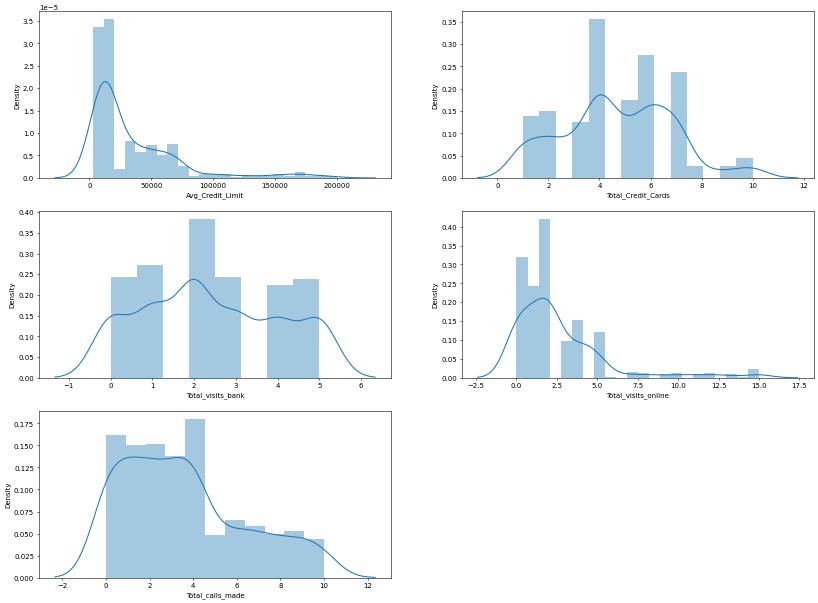

In [20]:
numcols = df.columns
fig, ax = plt.subplots(figsize=(20,15), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(3,2,i+1)
    sns.distplot(df[numcols[i]])
    plt.xlabel(numcols[i])

<b>Observation</b>
- Avg Credit limit is heavily right skewed
- credit cards, visits online, total calls have multiple peaks
- More customers have 4 or 5 credit cards
- More customers visited bank 2 times
- More customers made 2 to 4 calls to the bank

### Compare Total_Credit_Cards & Total_visits_bank

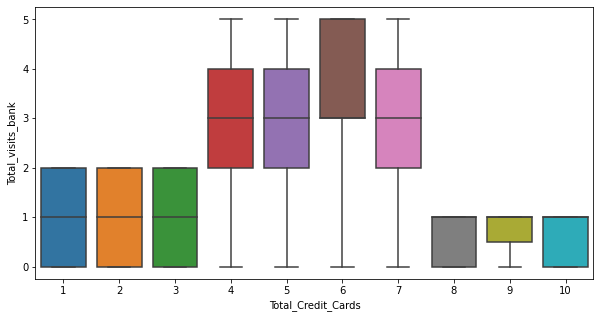

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Total_Credit_Cards", y="Total_visits_bank", data=df); 

### Compare Total_Credit_Cards & Total_visits_online

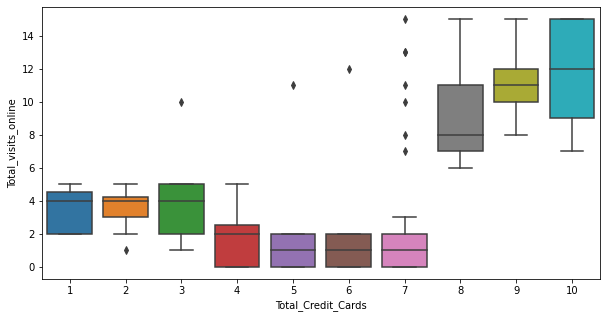

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Total_Credit_Cards", y="Total_visits_online", data=df);

### Compare Total_Credit_Cards & Total_calls_made

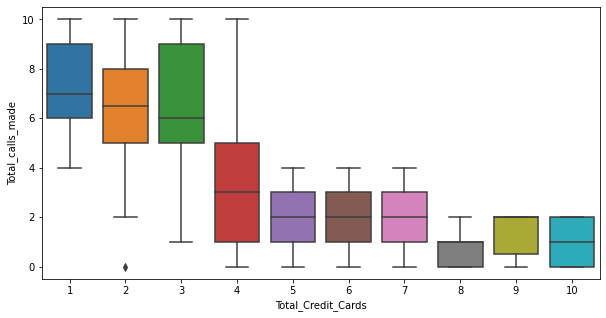

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Total_Credit_Cards", y="Total_calls_made", data=df);
   

### Outlier detection : Box plots for all features

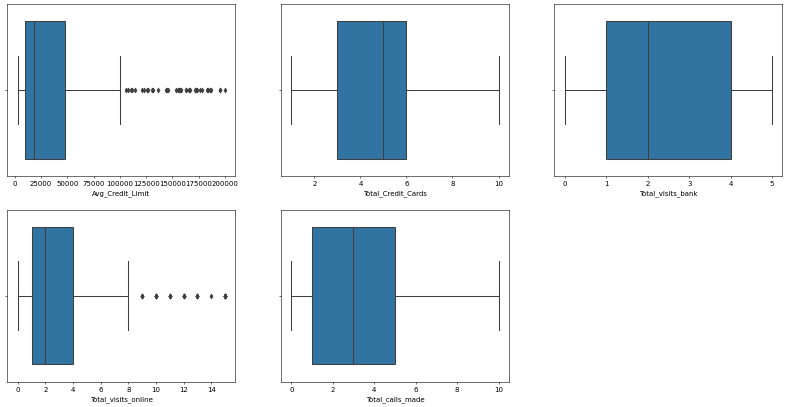

In [24]:
#Box plots
numcols = df.columns
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[numcols[i]])
    plt.xlabel(numcols[i])

<b>Observation</b>
- Avg Credit limit has lot of outliers
- visits online also has outliers
- People having 4 to 7 credit cards have visited bank often
- People having 8 to 10 credit cards have visited online often
- People having 1 to 4 credit cards have called bank more

In [25]:
df.skew()

Avg_Credit_Limit      2.2024
Total_Credit_Cards    0.1449
Total_visits_bank     0.1419
Total_visits_online   2.2256
Total_calls_made      0.6589
dtype: float64

### Count plots for all features

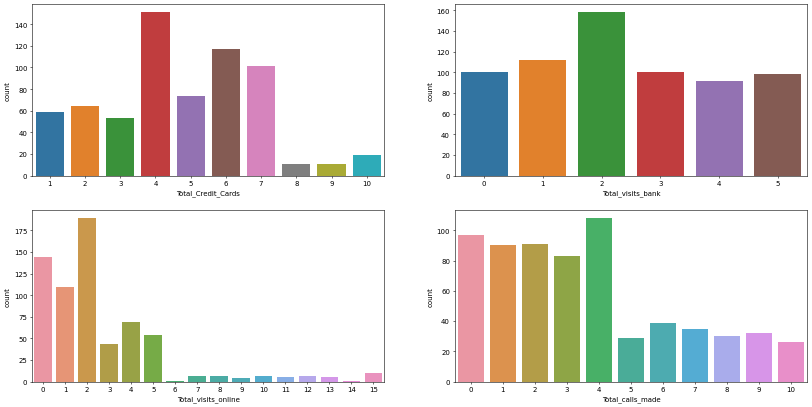

In [26]:
#Count Plots
countscols = ['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(countscols)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[countscols[i]])
    plt.xlabel(countscols[i])


<b>Observation</b>
- Majority of customers have 4 credit cards and then 6 and 7 credit cards. 
- Very few customers have more than 8 cards

### Line plot for all variables

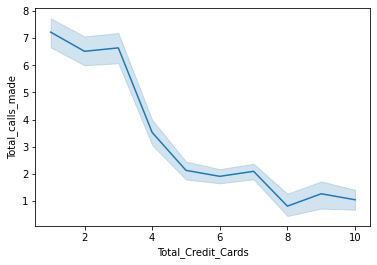

In [27]:
sns.lineplot(df['Total_Credit_Cards'],df['Total_calls_made']);

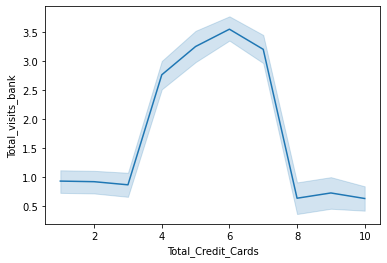

In [28]:
sns.lineplot(df['Total_Credit_Cards'],df['Total_visits_bank']);

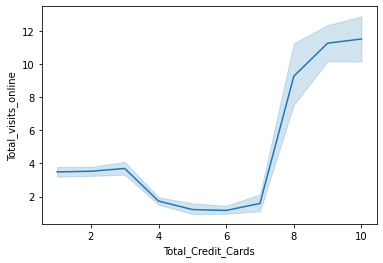

In [29]:
sns.lineplot(df['Total_Credit_Cards'],df['Total_visits_online']);

<b>Observation</b>
- People having 4 to 7 credit cards have visited bank often
- People having 8 to 10 credit cards have visited online often
- People having 1 to 4 credit cards have called bank more

### Pair Plot

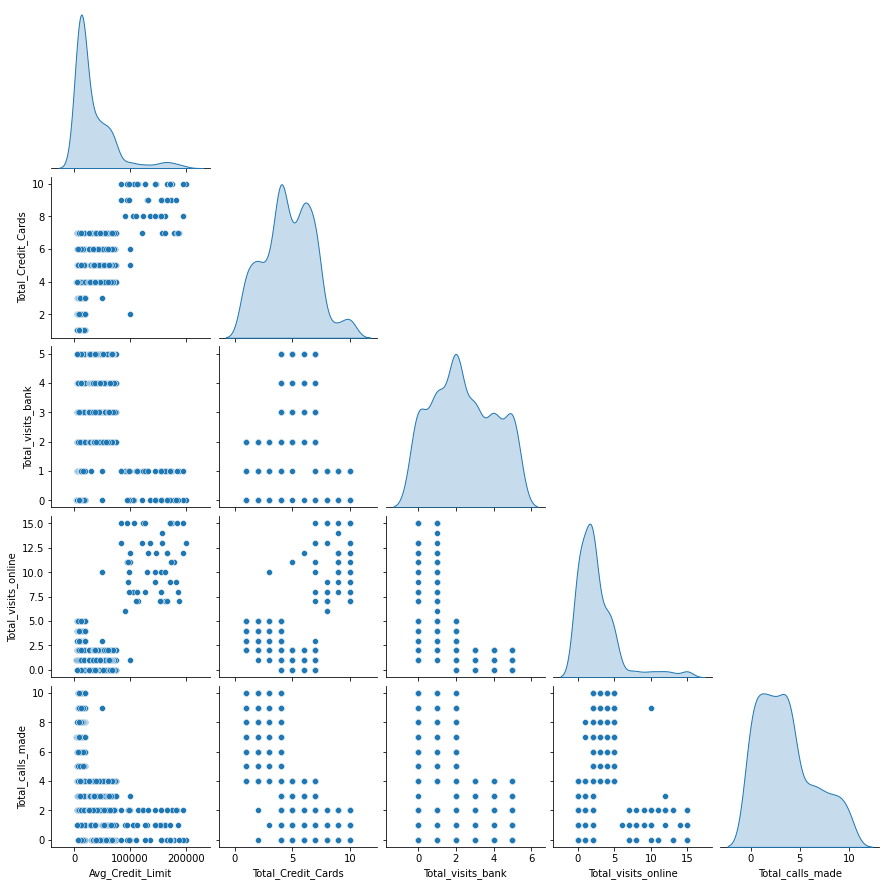

In [30]:
sns.pairplot(df, diag_kind='kde',corner=True);

<b>Observations</b>
   
   - 2 clusters between 
        - credit limit and credit cards
        - credit limit and visit online
        - total visits online and credit cards
        - total visits online and calls made
   -  Positive relationship
        - Credit cards and visit online
        - Credit limits and visit online
   -  Negative relationship
        - Visit bank and visit online
        - visit to bank and calls made 

### Heat map : Correlation plot

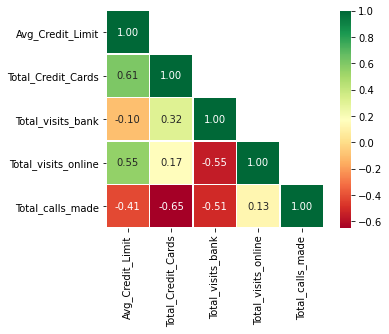

In [31]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(corr,mask=mask,annot=True, square=True,fmt='.2f',cmap='RdYlGn', linewidths=0.2)
plt.show()

<b>Observation</b>
- Positive relationship
  - Total Credit cards and Avg credit limit
  - Total Credit limits and visit online
- Negative relationship
  - Visit bank and visit online
  - Calls made and visit bank
  - Total credit cards and calls made

# Feature Generation

## Feature Generation

In [32]:
df_beforefeatureextraction = df.copy()
df['TotalCreditLimit'] = df['Avg_Credit_Limit']*df['Total_Credit_Cards']
df.drop(['Total_Credit_Cards','Avg_Credit_Limit'],axis=1,inplace=True)

In [33]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
0,1,1,0,200000
1,0,10,9,150000
2,1,3,4,350000
3,1,1,4,150000
4,0,12,3,600000


## Normalize / Scale data using MinMax Scaler

In [34]:
# from scipy.stats import zscore

df_beforescaling = df.copy()
# df =df.apply(zscore)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.loc[:,:] = scaler.fit_transform(df)

In [35]:
df_final = df.copy()

In [36]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
0,0.2000,0.0667,0.0000,0.0977
1,0.0000,0.6667,0.9000,0.0727
2,0.2000,0.2000,0.4000,0.1729
3,0.2000,0.0667,0.4000,0.0727
4,0.0000,0.8000,0.3000,0.2982


# Model Building

## K-Means Clustering

In [37]:
from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 20,max_iter=300,random_state=random_state,init="k-means++",)
    clusters.fit_predict(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df.sort_values('cluster_errors', ascending=True,inplace=True)
clusters_df[0:15]

,num_clusters,cluster_errors
8,9,18.0618
7,8,19.4582
6,7,22.0778
5,6,25.1243
4,5,28.3708
3,4,34.2345
2,3,50.4227
1,2,88.7884
0,1,167.5649


### Elbow method to find optimal no. of clusters

Text(0, 0.5, 'Inertia or WCSS')

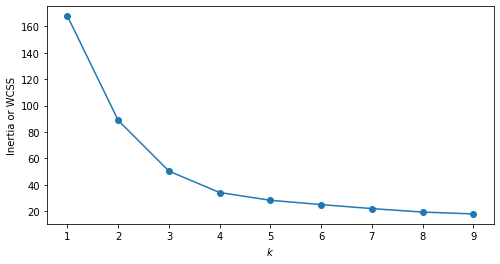

In [38]:
from matplotlib import cm

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Inertia or WCSS", fontsize=10)

<b>Observation</b>
- With the Elbow method , we can choose K=3 or K=4

### Select the number of clusters using the silhouette score

In [39]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []
kmeans_kwargs = {
    "init": "k-means++",
   "n_init": 20,
   "max_iter": 300,
   "random_state": random_state,}

for k in range(2, 15):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit_predict(df)
   score = silhouette_score(df, kmeans.labels_)
   silhouette_score_list.append(score)

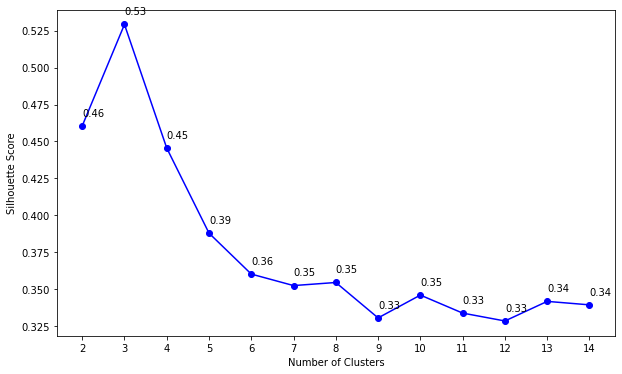

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 15), silhouette_score_list,'bo-')
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

for x,y in zip(range(2, 15), silhouette_score_list):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='left') 

plt.show()

<b>Observation</b>
- K-3 seems good choice
- Silhouette Score at k=3 is 0.53.

### Graphical representation of Silhouette Coefficient

In [41]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=random_state,n_init=20,max_iter=300).fit(df)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(df, model.labels_)
                     for model in kmeans_per_k[1:]]

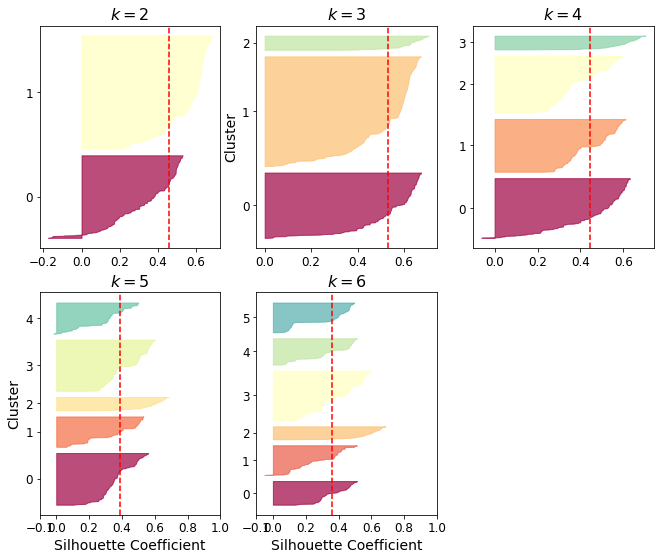

In [42]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(2, 3, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df, y_pred)

    padding = len(df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

In [43]:
df = df_final.copy()

In [44]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
0,0.2000,0.0667,0.0000,0.0977
1,0.0000,0.6667,0.9000,0.0727
2,0.2000,0.2000,0.4000,0.1729
3,0.2000,0.0667,0.4000,0.0727
4,0.0000,0.8000,0.3000,0.2982


### KMeans with 3 clusters based on high Silhouette score

In [45]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3,n_init = 500,max_iter=1000,random_state=random_state,init="k-means++")

In [46]:
kmeans.fit(df)
ypred = kmeans.labels_

In [47]:
#3 Cluster centroids that the algorithm found
kmeans.cluster_centers_

array([[0.70209424, 0.06474695, 0.19790576, 0.09106667],
       [0.18859649, 0.23508772, 0.68201754, 0.01359539],
       [0.12      , 0.72666667, 0.108     , 0.61383459]])

In [48]:
Allmodels = pd.DataFrame()
model_name = []
score_value=[]
score_name = []

In [49]:
model_name.append("KMeans_3")
score_name.append("silhouettescore")

In [50]:
score_value.append(round(silhouette_score(df, ypred),roundoff))
silhouette_score(df, ypred)

0.5290838250582389

<b>Observation</b>
- A silhouette score as 0.53 which is neither so good nor so bad

In [51]:
cscopy['KMeans_Cluster'] = ypred
df['KMeans_Cluster'] = ypred
df_beforescaling['KMeans_Cluster'] = ypred
cscopy.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2


In [52]:
cscopy['KMeans_Cluster'].value_counts(normalize=True)*100

0   57.8788
1   34.5455
2    7.5758
Name: KMeans_Cluster, dtype: float64

<b>Observation</b>
- Cluster 2 with ~7.5% of total customers
- Cluster 0 with ~34.5% of total customers
- Cluster 1 has ~57.8% of total customers

### Box plot : Cluster Analysis

Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
KMeans_Cluster         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

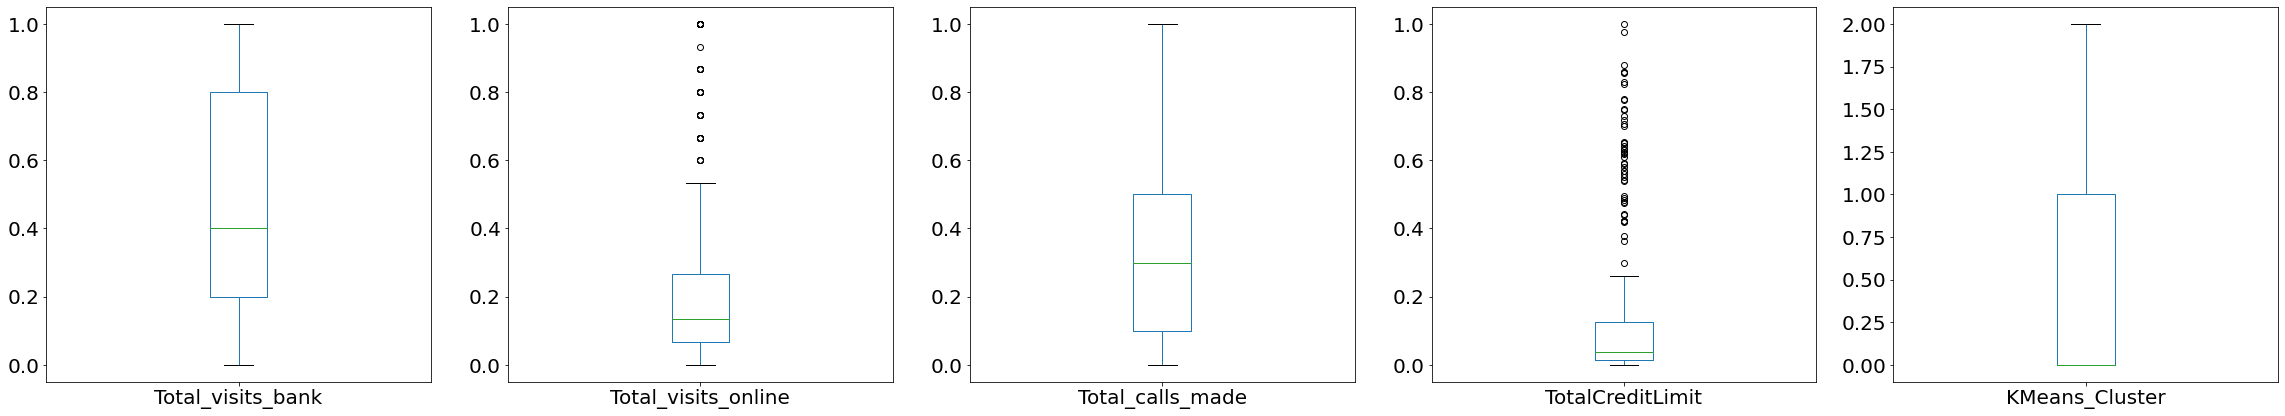

In [53]:
df.plot(by='KMeans_Cluster',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,fontsize=20, figsize = (40, 40))

<b>Observation</b>
- Cluster 0: 
    - Customers with medium credit limit 
    - Medium number of credit cards (~5,6)
    - Highest average bank visits  
    - Less online visits and medium calls to bank
- Cluster 1: 
    - Customers with low credit limit
    - Less credit cards,  medium bank visits, medium online visits
    - High calls to bank
- Cluster 2: 
    - Cutomers with highest Avg credit limit
    - High number of credit cards
    - Less bank visits, highest online visits and fewer calls made to bank

##  PCA - Dinemsion Reduction

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_red = pca.fit_transform(df)

In [55]:
pca.explained_variance_ratio_

array([0.78748343, 0.13722729, 0.05086288])

<b>Observation</b>
- By reducing the original dimensions of 4 to 3, we are able to get 95% of variance explained

In [56]:
pca_df = pd.DataFrame(df_red)

In [57]:
pca_df

,0,1,2
0,-0.4220,0.0691,0.5313
1,0.8312,-0.3699,0.0211
2,0.5650,0.0145,0.0927
3,0.5258,-0.0609,0.0990
4,1.6424,0.4293,-0.0009
...,...,...,...
655,1.4981,0.7784,-0.0333
656,1.5745,0.6379,-0.1337
657,1.5096,0.7190,-0.0659
658,1.6066,1.0157,-0.0445


### Using KMeans on PCA implemented Dataset

In [58]:
from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 500,max_iter=1000,random_state=random_state,init="k-means++",)
    clusters.fit(pca_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df.sort_values('cluster_errors', ascending=True,inplace=True)
clusters_df[0:15]

,num_clusters,cluster_errors
8,9,10.6406
7,8,12.1837
6,7,14.6462
5,6,17.1108
4,5,19.9741
3,4,25.4530
2,3,40.5106
1,2,119.4377
0,1,421.9930


<b>Observation</b>
- With K=3, cluster error (or clusters Inertia) is reduced 

###  Elbow method to find optimal no. of clusters

Text(0, 0.5, 'Inertia or WCSS')

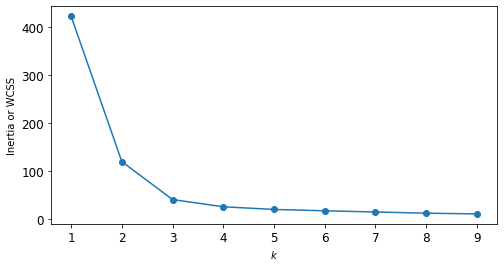

In [59]:
from matplotlib import cm

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Inertia or WCSS", fontsize=10)

<b>Observation</b>
- We can choose K=3 

### Graphical representation of Silhoutte coeff

In [60]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
   "n_init": 100,
   "max_iter": 3000,
   "random_state": random_state,}

for k in range(2, 10):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(pca_df)
   score = silhouette_score(pca_df, kmeans.labels_)
   silhouette_coefficients.append(score)

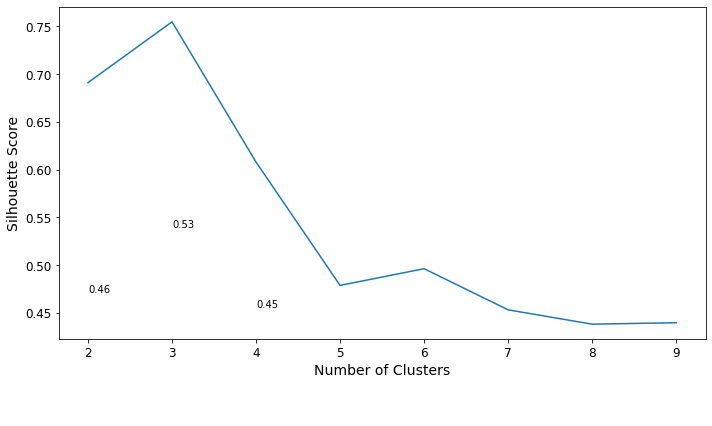

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
# zip joins x and y coordinates in pairs
for x,y in zip(range(2, 10), silhouette_score_list):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.tight_layout()

In [62]:
kmeans = KMeans(n_clusters=3, n_init = 500,max_iter=1000, random_state=random_state)
kmeans.fit(pca_df)
ypred = kmeans.labels_
pca_df['KMeans_Cluster'] = ypred

In [63]:
model_name.append('PCA_KMeans_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(pca_df, kmeans.labels_),roundoff))
silhouette_score(pca_df, kmeans.labels_)

0.8104836140199018

<b>Observation</b>
- With K=3, Silhouette score is increased from 0.53 (without PCA) to 0.81 (with PCA)

In [64]:
pca_df

,0,1,2,KMeans_Cluster
0,-0.4220,0.0691,0.5313,1
1,0.8312,-0.3699,0.0211,0
2,0.5650,0.0145,0.0927,0
3,0.5258,-0.0609,0.0990,0
4,1.6424,0.4293,-0.0009,2
...,...,...,...,...
655,1.4981,0.7784,-0.0333,2
656,1.5745,0.6379,-0.1337,2
657,1.5096,0.7190,-0.0659,2
658,1.6066,1.0157,-0.0445,2


In [65]:
pca_df.groupby('KMeans_Cluster').mean()

,0,1,2
KMeans_Cluster,,,
0,0.6162,-0.2707,-0.0222
1,-0.5737,0.0655,0.0143
2,1.5730,0.7339,-0.0081


In [66]:
df = df_final.copy()

## Hierarchical Clustering

### Agglomerative Clustering

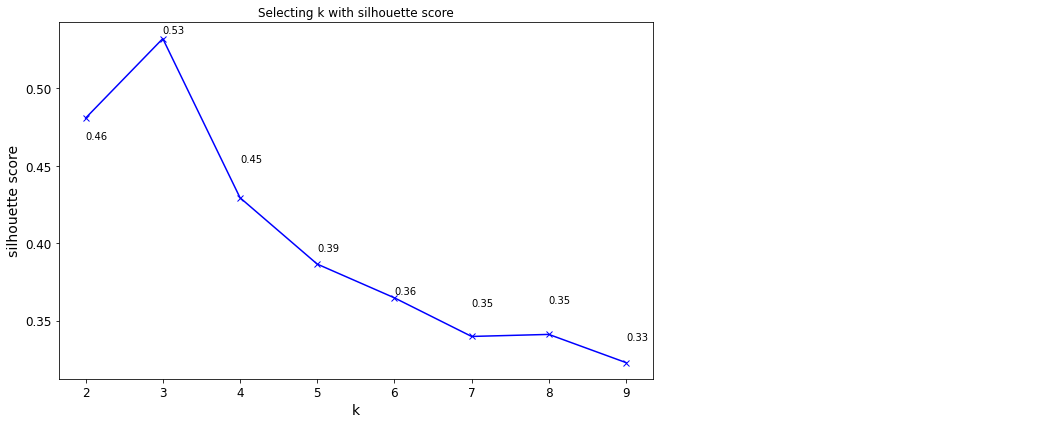

In [67]:
from sklearn.cluster import AgglomerativeClustering 

meanDistortions=[]
#Using Average linkage
for k in range(2, 10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(df)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df, prediction))

fig = plt.figure(figsize=(18, 6))
plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score');
# zip joins x and y coordinates in pairs
for x,y in zip(range(2, 15), silhouette_score_list):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.tight_layout()

In [68]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [69]:
model_name.append('AgglomerativeClustering_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5321168992998623

In [70]:
cscopy['agg_cluster'] = Aggmodel.labels_
df['agg_cluster'] = Aggmodel.labels_

In [71]:
cscopy.groupby('agg_cluster').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster
agg_cluster,,,,,,,,
0,115.7248,55004.4128,12394.4954,2.4404,0.8945,3.5688,6.9495,1.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000
2,414.1276,55017.7372,33329.0816,5.4515,3.4719,1.0128,2.0306,0.0255


In [72]:
cscopy.groupby('agg_cluster').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster
agg_cluster,,,,,,,,
0,218,218,218,218,218,218,218,218
1,50,50,50,50,50,50,50,50
2,392,392,392,392,392,392,392,392


<b>Observation</b>
- Cluster 0 : 218 data points
- Cluster 1 : 50 data points 
- Cluster 2 : 392 data points.

In [73]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,agg_cluster
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1


Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
agg_cluster            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

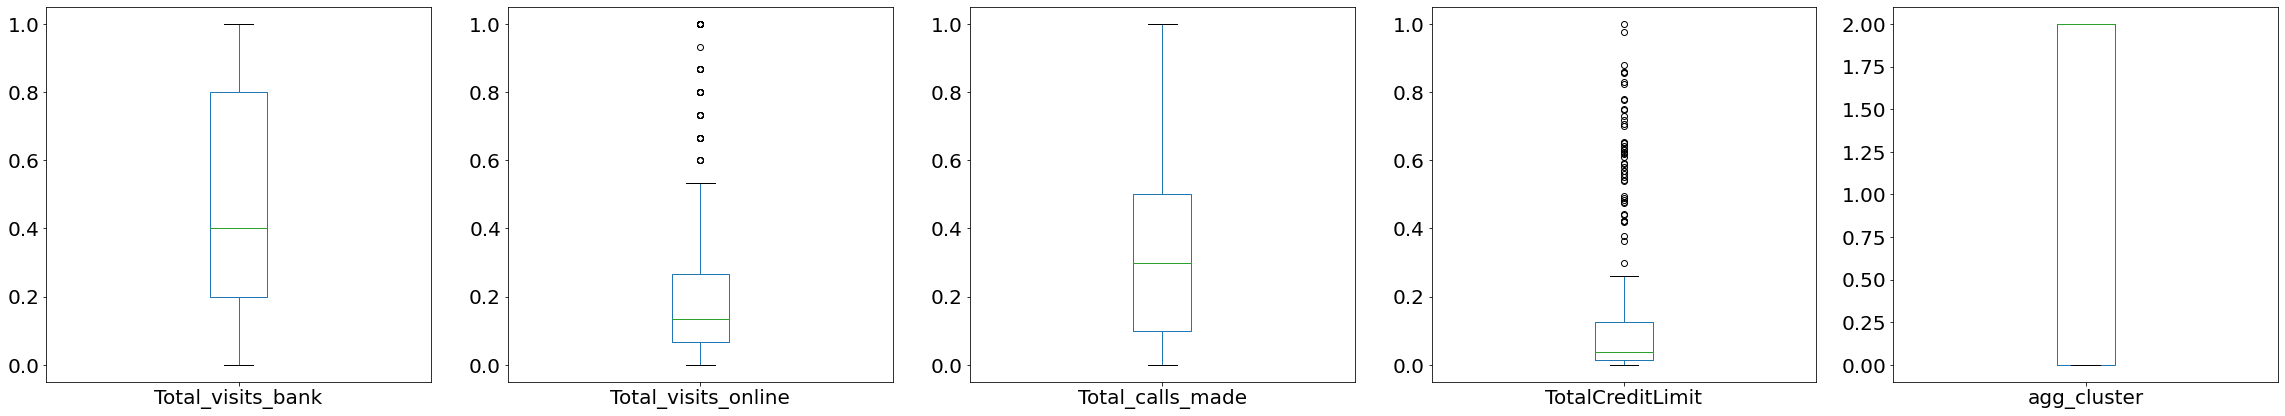

In [74]:
df.plot(by='agg_cluster',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<b>Observation on Clusters created by Agglomerative Clustering</b>

- Cluster 0: 
    - Customers with lower Total credit limit 
    - High calls to bank, medium bank visits, medium online visits
- Cluster 1: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and highest online visits
- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits

In [75]:
df = df_final.copy()

### Agglomerative Clustering using Complete linkage

In [76]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [77]:
model_name.append('Agg_linkage_complete_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.518852969914885

In [78]:
cscopy['Agg_linkage_complete_3'] = Aggmodel.labels_
df['Agg_linkage_complete_3'] = Aggmodel.labels_

In [79]:
cscopy.groupby('Agg_linkage_complete_3').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster
Agg_linkage_complete_3,,,,,,,,,
0,142.4413,55201.3320,14412.9555,2.7368,1.0243,3.2915,6.6032,0.9231,0.2348
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000
2,419.7879,54884.8099,33628.0992,5.4904,3.5895,0.9972,1.8733,0.0000,2.0000


<b>Observation</b>
- Cluster 2: 
    - Customers with medium credit limit ,medium number of credit cards
    - High average bank visits , less online visits , medium calls to bank
- Cluster 0: 
    - Customers with low credit limit, fewer credit cards
    - Medium bank visits, medium online visits and High calls to bank
- Cluster 1: 
    - Cutomers with high Avg credit limit, high number of credit cards
    - very less bank visits, high online visits and fewer calls made to bank

In [80]:
cscopy.groupby('Agg_linkage_complete_3').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster
Agg_linkage_complete_3,,,,,,,,,
0,247,247,247,247,247,247,247,247,247
1,50,50,50,50,50,50,50,50,50
2,363,363,363,363,363,363,363,363,363


<b>Observation</b>
- Cluster 0 : 247 data points
- Cluster 1 : 50 data points 
- Cluster 2 : 363 data points.

Total_visits_bank            AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Agg_linkage_complete_3    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

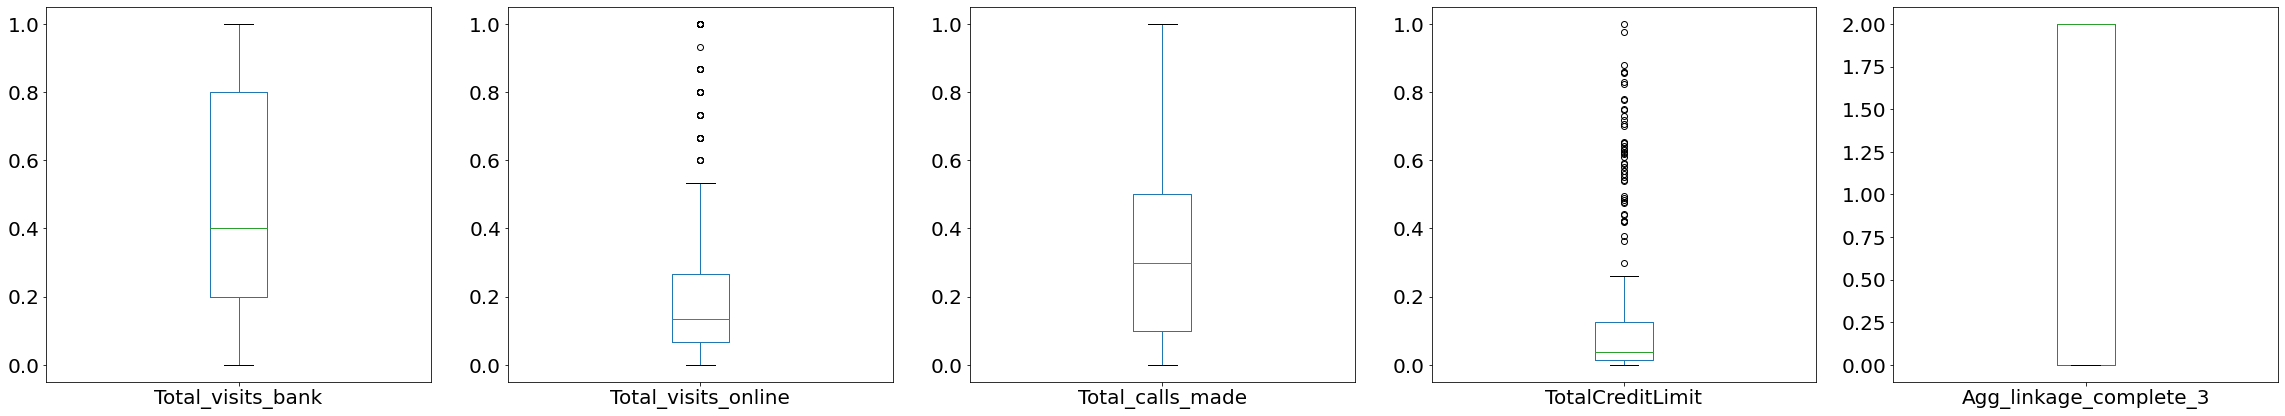

In [81]:
df.plot(by='Agg_linkage_complete_3',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

        <b>Observation </b>

        - Cluster 0: 
            - Customers with lower Total credit limit
            - High calls to bank, medium bank visits, medium online visits

        - Cluster 1: 
            - Customers with higher Total credit limit
            - Less calls made to bank, less bank visits and high online visits

        - Cluster 2: 
            - Customers with medium credit limit
            - Less calls made, more bank visits and less online visits

In [82]:
df = df_final.copy()

### Agglomerative Clustering using ward linkage

In [83]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [84]:
model_name.append('Agg_linkage_ward_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5290838250582389

In [85]:
cscopy['Agg_linkage_ward_3'] = Aggmodel.labels_
df['Agg_linkage_ward_3'] = Aggmodel.labels_

In [86]:
cscopy.groupby('Agg_linkage_ward_3').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3
Agg_linkage_ward_3,,,,,,,,,,
0,420.4110,55001.3639,33863.8743,5.5131,3.5105,0.9712,1.9791,0,2.0000,1.9005
1,118.2851,55032.4298,12416.6667,2.4693,0.9430,3.5263,6.8202,1,0.0877,0.0000
2,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2,1.0000,1.0000


In [87]:
cscopy.groupby('Agg_linkage_ward_3').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3
Agg_linkage_ward_3,,,,,,,,,,
0,382,382,382,382,382,382,382,382,382,382
1,228,228,228,228,228,228,228,228,228,228
2,50,50,50,50,50,50,50,50,50,50


<b>Observation</b>
- Cluster 0 : 382 data points
- Cluster 1 : 228 data points
- Cluster 2 : 50 data points.

Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Agg_linkage_ward_3     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

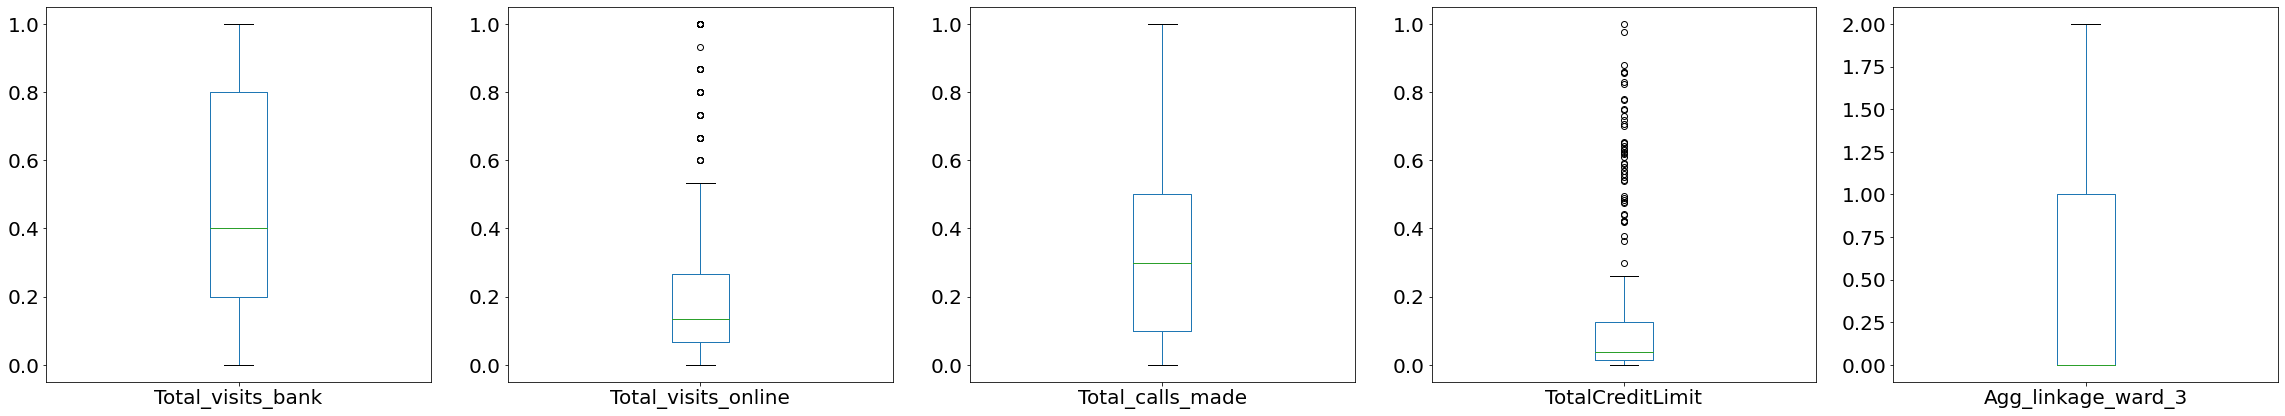

In [88]:

df.plot(by='Agg_linkage_ward_3',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<p><b>Observations</b></p>

- Cluster 0: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and less online visits

- Cluster 1: 
    - Customers with less Total credit limit
    - High calls to bank, medium bank visits, medium online visits

- Cluster 2: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and high online visits

In [89]:
df = df_final.copy()

### Agglomerative Clustering using l2 and average linkage

In [90]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='l2',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [91]:
model_name.append('Agg_linkage_avg_l2')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5321168992998623

In [92]:
cscopy['Agg_linkage_avg_l2'] = Aggmodel.labels_
df['Agg_linkage_avg_l2'] = Aggmodel.labels_

In [93]:
cscopy.groupby('Agg_linkage_avg_l2').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3
Agg_linkage_avg_l2,,,,,,,,,,,
0,115.7248,55004.4128,12394.4954,2.4404,0.8945,3.5688,6.9495,1.0000,0.0000,0.0000,1.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000
2,414.1276,55017.7372,33329.0816,5.4515,3.4719,1.0128,2.0306,0.0255,2.0000,1.8520,0.0255


In [94]:
cscopy.groupby('Agg_linkage_avg_l2').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3
Agg_linkage_avg_l2,,,,,,,,,,,
0,218,218,218,218,218,218,218,218,218,218,218
1,50,50,50,50,50,50,50,50,50,50,50
2,392,392,392,392,392,392,392,392,392,392,392


<b>Observation</b>
- Cluster 0 : 218 data points
- Cluster 1 : 50 data points
- Cluster 2 : 392 data points

Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Agg_linkage_avg_l2     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

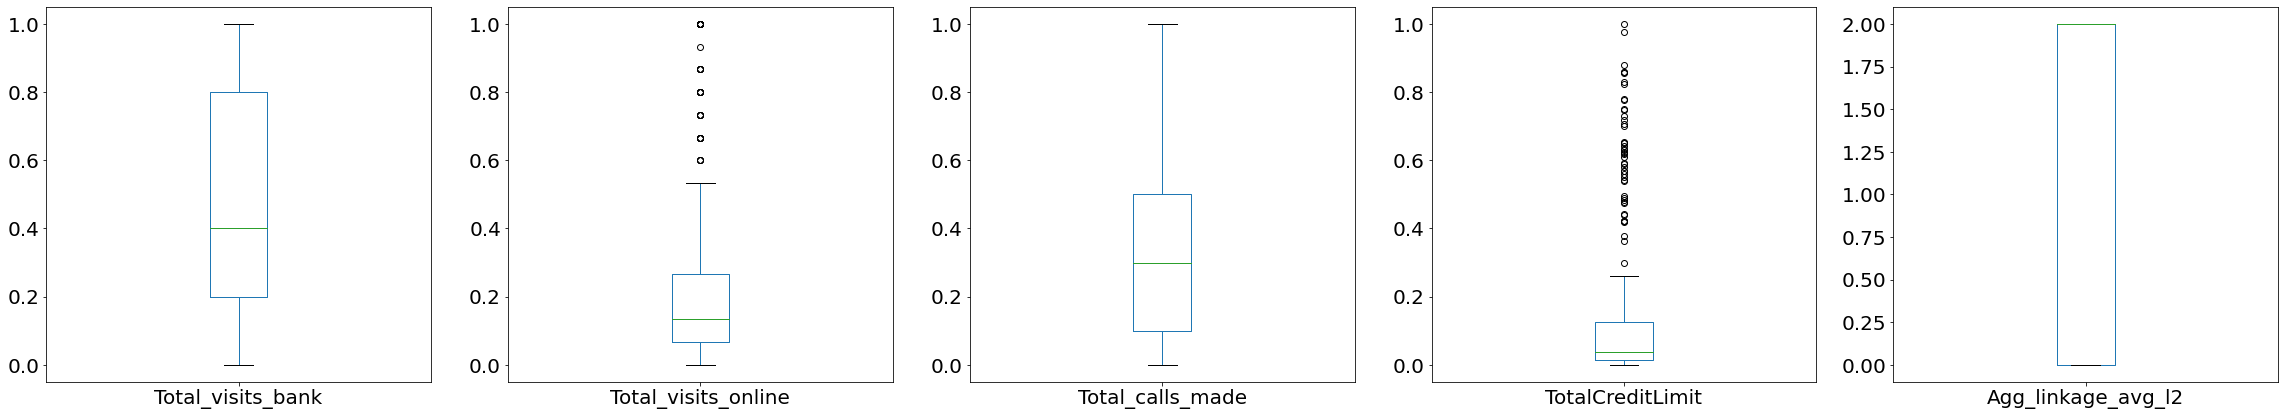

In [95]:
df.plot(by='Agg_linkage_avg_l2',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<p><b>Observations</b></p>

- Cluster 0: 
    - Customers with lower Total credit limit
    - High calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and high online visits

- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, high bank visits and less online visits

In [96]:
df = df_final.copy()

### Agglomerative Clustering using l1 and average linkage

In [97]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='l1',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [98]:
model_name.append('Agg_linkage_avg_l1')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5311324052072582

In [99]:
cscopy['Agg_linkage_avg_l1'] = Aggmodel.labels_
df['Agg_linkage_avg_l1'] = Aggmodel.labels_

In [100]:
cscopy.groupby('Agg_linkage_avg_l1').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2
Agg_linkage_avg_l1,,,,,,,,,,,,
0,116.7176,54958.7778,12416.6667,2.4398,0.9028,3.5880,7.0000,1.0000,0.0000,0.0000,1.0000,0.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000
2,412.0685,55042.6878,33210.6599,5.4365,3.4543,1.0152,2.0279,0.0305,1.9898,1.8426,0.0305,1.9898


In [101]:
cscopy.groupby('Agg_linkage_avg_l1').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2
Agg_linkage_avg_l1,,,,,,,,,,,,
0,216,216,216,216,216,216,216,216,216,216,216,216
1,50,50,50,50,50,50,50,50,50,50,50,50
2,394,394,394,394,394,394,394,394,394,394,394,394


<b>Observation</b>
- Cluster 0 : 216 data points
- Cluster 1 : 50 data points
- Cluster 2 : 394 data points.

In [102]:
df

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_avg_l1
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1
...,...,...,...,...,...
655,0.2000,0.6667,0.0000,0.4937,1
656,0.2000,0.8667,0.2000,0.4185,1
657,0.2000,0.6000,0.1000,0.5789,1
658,0.2000,1.0000,0.0000,0.8596,1


Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Agg_linkage_avg_l1     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

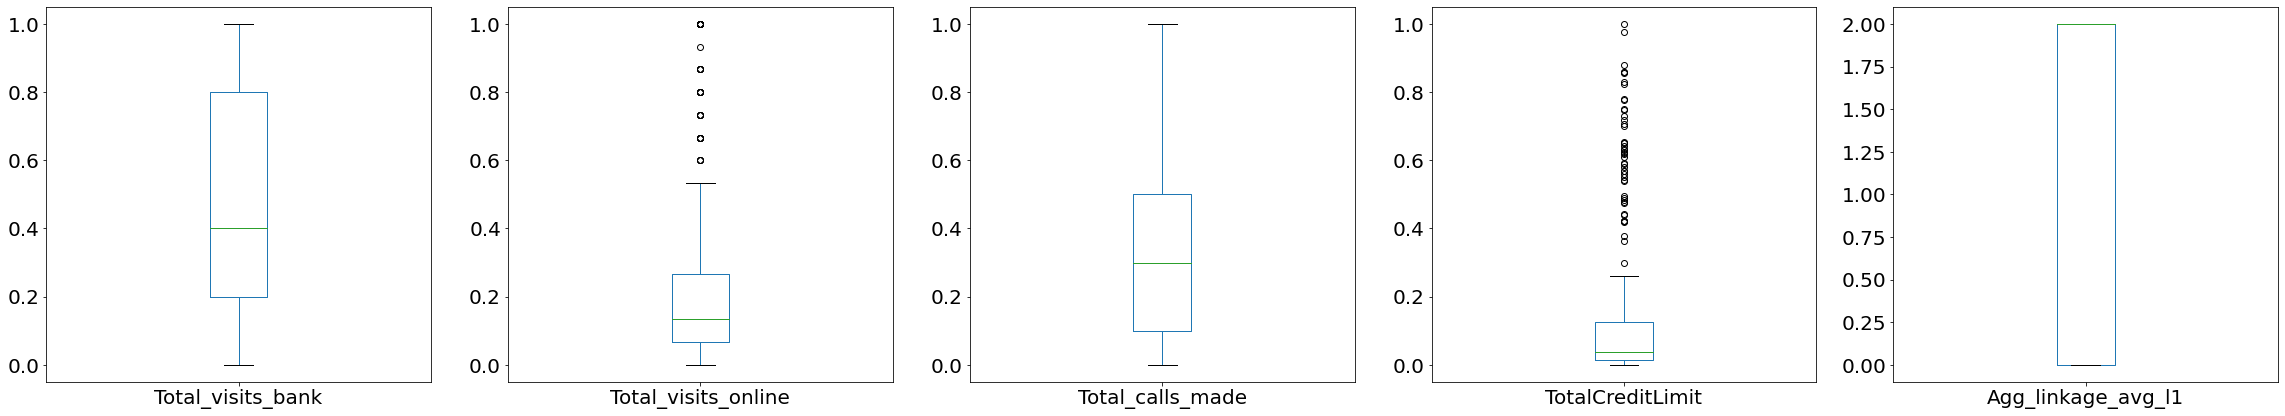

In [103]:
#df.boxplot(by='Agg_linkage_avg_l1', layout=(1,4), figsize=(15,6));
df.plot(by='Agg_linkage_avg_l1',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<b>Observations:</b>

- Cluster 0: 
    - Customers with lower Total credit limit
    - More calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank, less bank visits and High online visits

- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits

In [104]:
df = df_final.copy()

### Agglomerative Clustering using Manhattan and average linkage

In [105]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='manhattan',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [106]:
model_name.append('Agg_linkage_avg_manhattan')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5311324052072582

In [107]:
cscopy['Agg_linkage_avg_manhattan'] = Aggmodel.labels_
df['Agg_linkage_avg_manhattan'] = Aggmodel.labels_

In [108]:
cscopy.groupby('Agg_linkage_avg_manhattan').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1
Agg_linkage_avg_manhattan,,,,,,,,,,,,,
0,116.7176,54958.7778,12416.6667,2.4398,0.9028,3.5880,7.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000
2,412.0685,55042.6878,33210.6599,5.4365,3.4543,1.0152,2.0279,0.0305,1.9898,1.8426,0.0305,1.9898,2.0000


In [109]:
cscopy.groupby('Agg_linkage_avg_manhattan').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1
Agg_linkage_avg_manhattan,,,,,,,,,,,,,
0,216,216,216,216,216,216,216,216,216,216,216,216,216
1,50,50,50,50,50,50,50,50,50,50,50,50,50
2,394,394,394,394,394,394,394,394,394,394,394,394,394


<b>Observation</b>
- Cluster 0 : 216 data points
- Cluster 1 : 50 data points 
- Cluster 2 : 394 data points.

In [110]:
df

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_avg_manhattan
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1
...,...,...,...,...,...
655,0.2000,0.6667,0.0000,0.4937,1
656,0.2000,0.8667,0.2000,0.4185,1
657,0.2000,0.6000,0.1000,0.5789,1
658,0.2000,1.0000,0.0000,0.8596,1


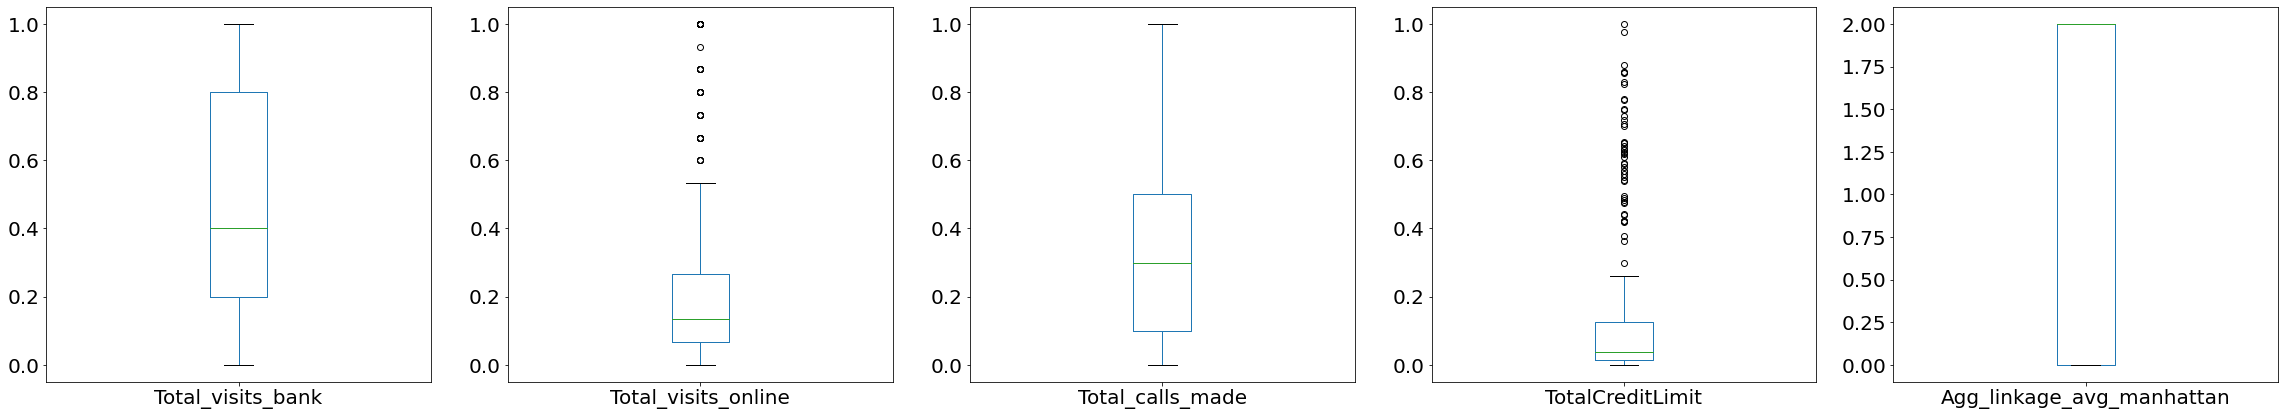

In [111]:
df.plot(by='Agg_linkage_avg_manhattan',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))
plt.show()

<b>Observations</b>

- Cluster 0: 
    - Customers with lower Total credit limit
    - More calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank, less bank visits and High online visits

- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits

In [112]:
df = df_final.copy()

### Agglomerative Clustering using cosine and average linkage

In [113]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='cosine',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [114]:
model_name.append('Agg_linkage_avg_cosine')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.531481449513644

In [115]:
cscopy['Agg_linkage_avg_cosine'] = Aggmodel.labels_
df['Agg_linkage_avg_cosine'] = Aggmodel.labels_

In [116]:
cscopy.groupby('Agg_linkage_avg_cosine').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan
Agg_linkage_avg_cosine,,,,,,,,,,,,,,
0,417.0412,55185.0464,33481.9588,5.4768,3.4871,0.9871,2.0103,0.0155,2.0000,1.8711,0.0155,2.0000,2.0000,2.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000
2,116.0090,54712.2387,12504.5045,2.4505,0.9144,3.5676,6.8964,1.0000,0.0360,0.0000,1.0000,0.0360,0.0541,0.0541


In [117]:
cscopy.groupby('Agg_linkage_avg_cosine').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan
Agg_linkage_avg_cosine,,,,,,,,,,,,,,
0,388,388,388,388,388,388,388,388,388,388,388,388,388,388
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,222,222,222,222,222,222,222,222,222,222,222,222,222,222


<b>Observation</b>
- Cluster 0 : 388 data points
- Cluster 1 : 50 data points 
- Cluster 2 : 222 data points.

In [118]:
df

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_avg_cosine
0,0.2000,0.0667,0.0000,0.0977,0
1,0.0000,0.6667,0.9000,0.0727,2
2,0.2000,0.2000,0.4000,0.1729,2
3,0.2000,0.0667,0.4000,0.0727,2
4,0.0000,0.8000,0.3000,0.2982,1
...,...,...,...,...,...
655,0.2000,0.6667,0.0000,0.4937,1
656,0.2000,0.8667,0.2000,0.4185,1
657,0.2000,0.6000,0.1000,0.5789,1
658,0.2000,1.0000,0.0000,0.8596,1


Total_visits_bank            AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Agg_linkage_avg_cosine    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

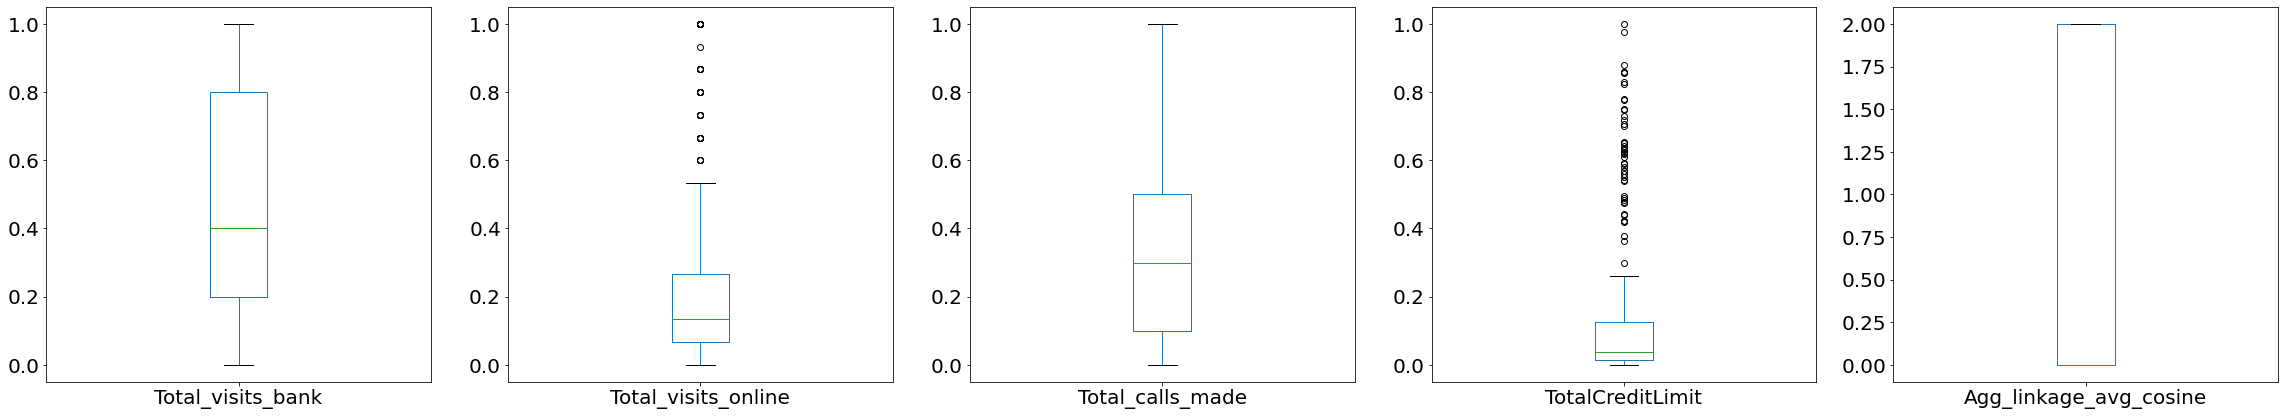

In [119]:
df.plot(by='Agg_linkage_avg_cosine',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<p><b>Observations</b></p>

- Cluster 0: 
    - Customers with lower Total credit limit 
    - More calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit 
    - Fewer calls made to bank, less bank visits and high online visits

- Cluster 2: 
    - Customers with medium credit limit 
    - Less calls made, more bank visits and less online visits

In [120]:
df = df_final.copy()

## Different Linkages using Scipy Cluster

### Hierachicial clustering with Linkage - Average

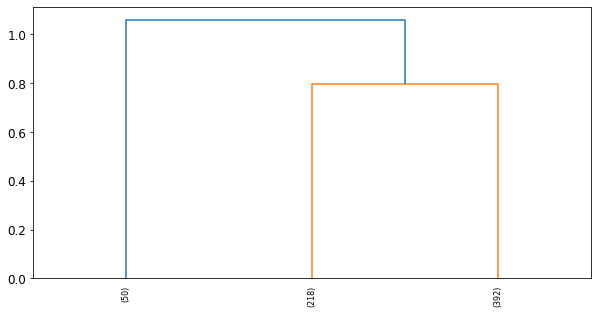

In [121]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

ZAvg = linkage(df, metric='euclidean', method='average',optimal_ordering=True)
# Compute the cophenetic correlation
c, coph_dists = cophenet(ZAvg , pdist(df))
plt.figure(figsize=(10, 5))

dendrogram(ZAvg, p=3, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 0.8,  leaf_font_size=8.)
plt.show()

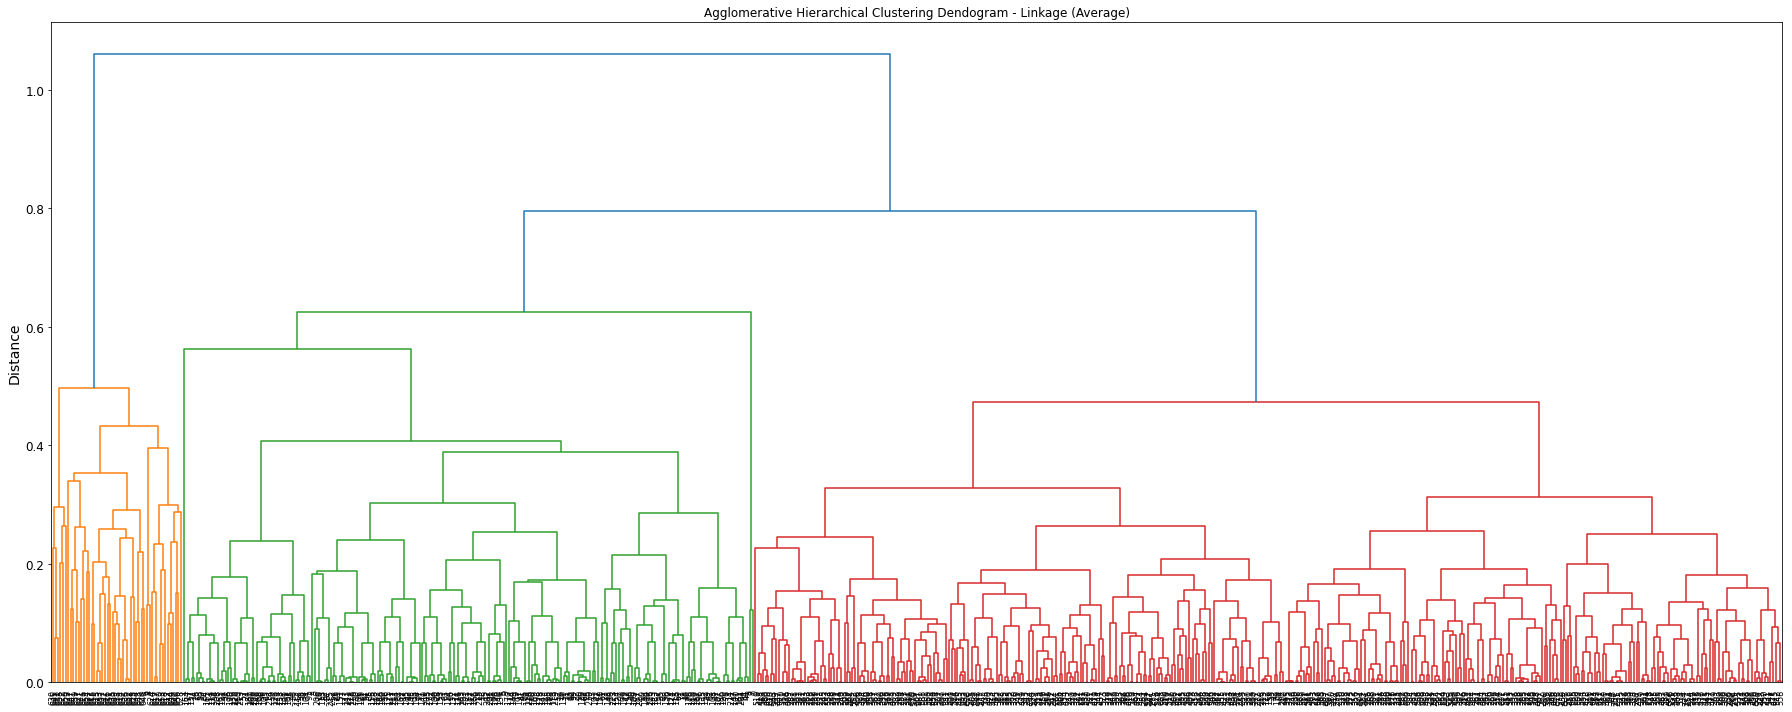

In [122]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Linkage (Average)')
plt.ylabel('Distance')
dendrogram(ZAvg, leaf_rotation=90.,color_threshold = 0.7, leaf_font_size=8. )
plt.tight_layout()

In [123]:
#cophenetic correlation
c

0.8284407904470636

<b>Observation</b>
- Cophenetic correlation as 0.82 is good
- More closer to 1 is better

In [124]:
model_name.append('Linkage_Avg')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

###### Getting the clusters and cluster labels

In [125]:
from scipy.cluster.hierarchy import fcluster
LinkageAvg = fcluster(ZAvg, 0.7, criterion='distance')

In [126]:
LinkageAvg

array([3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [127]:
model_name.append('Linkage_Avg')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, LinkageAvg),roundoff))
silhouette_score(df, LinkageAvg)

0.5321168992998623

In [128]:
cscopy['Linkage_Avg'] = LinkageAvg
df['Linkage_Avg'] = LinkageAvg

In [129]:
cscopy['Linkage_Avg'].value_counts(normalize=True)*100

3   59.3939
2   33.0303
1    7.5758
Name: Linkage_Avg, dtype: float64

<b>Observation</b>
- Cluster 3 has ~59% of total customers
- Cluster 2 with ~33% of total customers
- Cluster 1 with ~8% of total customers

In [130]:
cscopy.groupby('Linkage_Avg').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine
Linkage_Avg,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
3,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392


<b>Observation</b>
- Cluster 1 with 50 customers
- Cluster 2 has 218 customers
- Cluster 3 with 392 customers

In [131]:
cscopy.groupby('Linkage_Avg').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine
Linkage_Avg,,,,,,,,,,,,,,,
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000
2,115.7248,55004.4128,12394.4954,2.4404,0.8945,3.5688,6.9495,1.0000,0.0000,0.0000,1.0000,0.0000,0.0183,0.0183,2.0000
3,414.1276,55017.7372,33329.0816,5.4515,3.4719,1.0128,2.0306,0.0255,2.0000,1.8520,0.0255,2.0000,2.0000,2.0000,0.0204


#### Box plot : Linkage - Average

Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Linkage_Avg            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

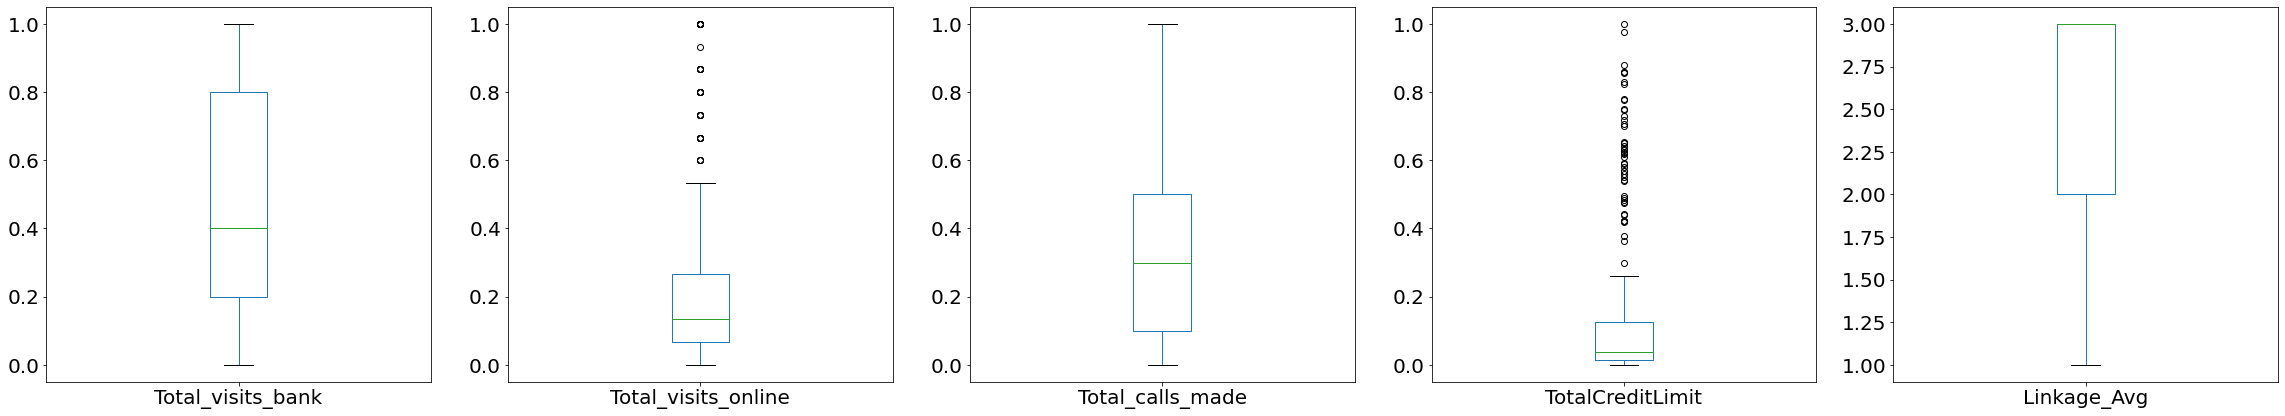

In [132]:
df.plot(by='Linkage_Avg',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<b>Observation</b>
- Cluster 1: 
    - Customers with High avg credit limit, High number of credit card
    - Less bank visits, HIgh online visits and fewer calls made to bank
- Cluster 2: 
    - Customers with low credit limit, fewer credit cards
    - Medium bank visits, medium online visits and High calls to bank
- Cluster 3: 
    - Customers with medium credit limit ,medium number of credit cards
    - High average bank visits , less online visits and medium calls to bank

In [133]:
df = df_final.copy()

### Linkage - Complete

In [134]:
Zcomp = linkage(df, metric='euclidean', method='complete')
c, coph_dists = cophenet(Zcomp , pdist(df))

c

0.7825424167863714

In [135]:
model_name.append('Linkage_Complete')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

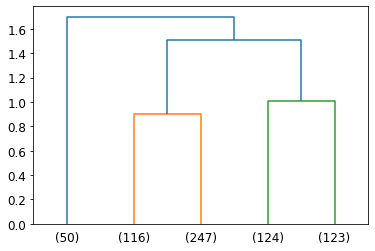

In [136]:
dendrogram(
    Zcomp,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

In [137]:
linkage_Complete = fcluster(Zcomp, 1.4, criterion='distance')

In [138]:
linkage_Complete

array([2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [139]:
model_name.append('linkage_Complete')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, linkage_Complete),roundoff))
silhouette_score(df, linkage_Complete)

0.518852969914885

In [140]:
cscopy['linkage_Complete'] = linkage_Complete
df['linkage_Complete'] = linkage_Complete

In [141]:
cscopy['linkage_Complete'].value_counts(normalize=True)*100

2   55.0000
3   37.4242
1    7.5758
Name: linkage_Complete, dtype: float64

<b>Observation</b>
- Cluster 2 has ~55% of total customers
- Cluster 3 with ~37% of total customers
- Cluster 1 with ~7.5% of total customers

In [142]:
cscopy.groupby('linkage_Complete').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg
linkage_Complete,,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363
3,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247


<b>Observation</b>
- Cluster 1 with 50 customers
- Cluster 2 has 363 customers
- Cluster 3 with 247 customers

In [143]:
cscopy.groupby('linkage_Complete').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg
linkage_Complete,,,,,,,,,,,,,,,,
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,419.7879,54884.8099,33628.0992,5.4904,3.5895,0.9972,1.8733,0.0000,2.0000,2.0000,0.0000,2.0000,2.0000,2.0000,0.0000,3.0000
3,142.4413,55201.3320,14412.9555,2.7368,1.0243,3.2915,6.6032,0.9231,0.2348,0.0000,0.9231,0.2348,0.2510,0.2510,1.7976,2.1174


####  Box plot : Linkage - Complete

Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
linkage_Complete       AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

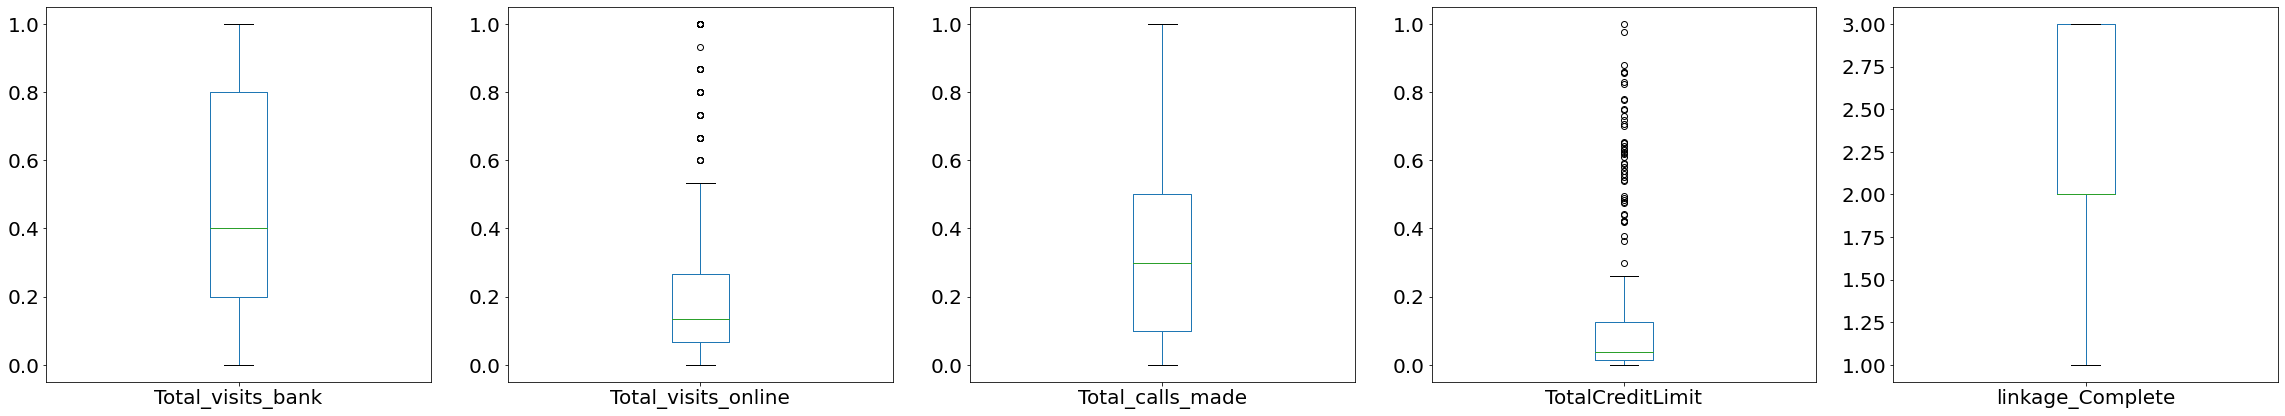

In [144]:
df.plot(by='linkage_Complete',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<b>Observations:</b>
- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank, very less bank visits and High online visits
- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits
- Cluster 3: 
    - Customers with lower Total credit limit
    - More calls to bank, medium bank visits, medium online visits

In [145]:
df = df_final.copy()

### Linkage - Ward

In [146]:
Zward= linkage(df, metric='euclidean', method='ward')
c, coph_dists = cophenet(Zward , pdist(df))

c

0.7383865792365224

In [147]:
model_name.append('Linkage_Ward')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

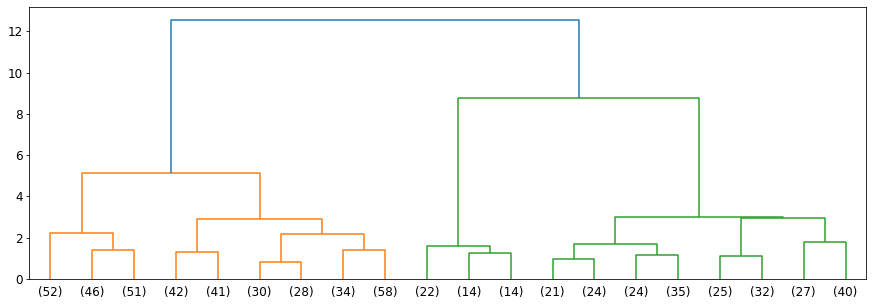

In [148]:
plt.figure(figsize=(15, 5))
dendrogram(
    Zward,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
)
plt.show()

In [149]:
Linkage_Ward = fcluster(Zward, 8, criterion='distance')

In [150]:
Linkage_Ward

array([1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [151]:
model_name.append('Linkage_Ward')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, Linkage_Ward),roundoff))
silhouette_score(df, Linkage_Ward)

0.5290838250582389

In [152]:
cscopy['Linkage_Ward'] = Linkage_Ward
df['Linkage_Ward'] = Linkage_Ward

In [153]:
cscopy['Linkage_Ward'].value_counts(normalize=True)*100

1   57.8788
3   34.5455
2    7.5758
Name: Linkage_Ward, dtype: float64

<b>Observation</b>
- Cluster 3 has ~58% of total customers
- Cluster 1 with ~34.5% of total customers
- Cluster 2 with ~7.5% of total customers

In [154]:
cscopy.groupby('Linkage_Ward').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete
Linkage_Ward,,,,,,,,,,,,,,,,,
1,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
3,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228


<b>Observation</b>
- Cluster 1 with 382 customers
- Cluster 2 has 50 customers
- Cluster 3 with 228 customers

In [155]:
cscopy.groupby('Linkage_Ward').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete
Linkage_Ward,,,,,,,,,,,,,,,,,
1,420.4110,55001.3639,33863.8743,5.5131,3.5105,0.9712,1.9791,0.0000,2.0000,1.9005,0.0000,2.0000,2.0000,2.0000,0.0000,3.0000,2.0497
2,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,118.2851,55032.4298,12416.6667,2.4693,0.9430,3.5263,6.8202,1.0000,0.0877,0.0000,1.0000,0.0877,0.1053,0.1053,1.9474,2.0439,3.0000


#### Box plot : Limkage - Ward

Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Linkage_Ward           AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

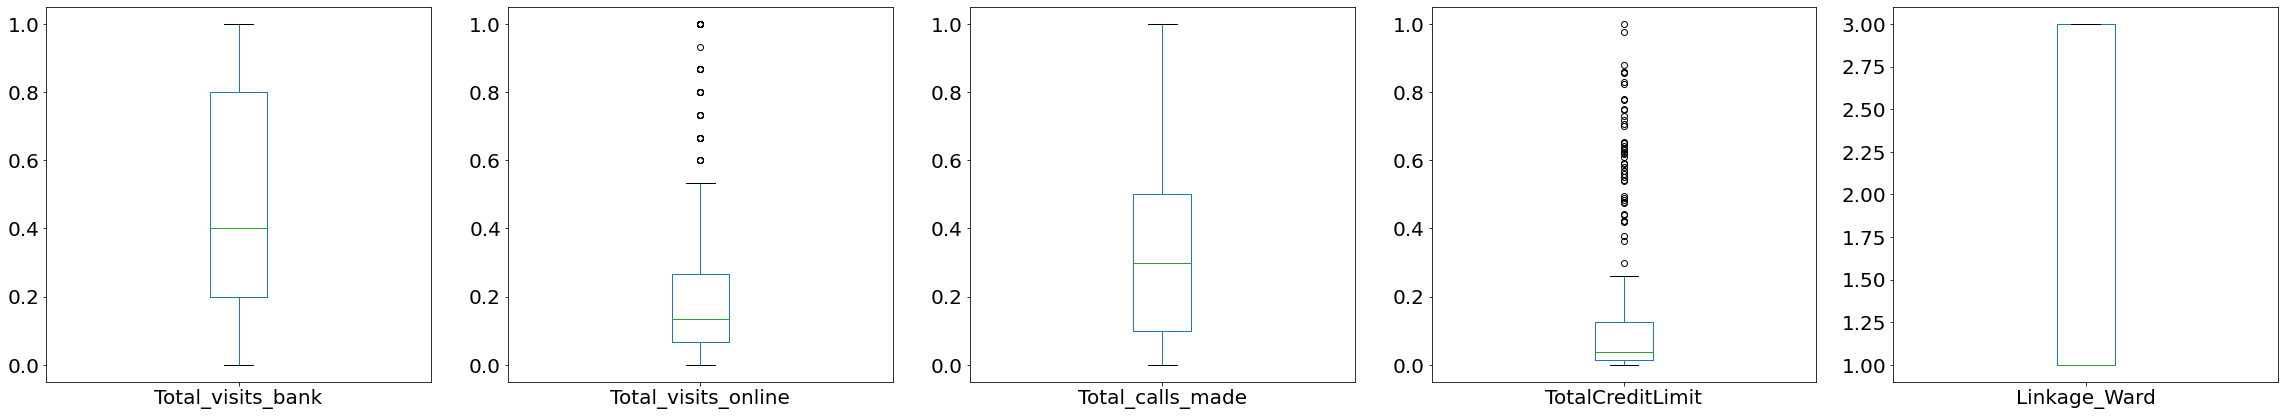

In [156]:
df.plot(by='Linkage_Ward',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<b>Observations</b>
- Cluster 1: 
    - Customers with medium credit limit
    - Few calls made, more bank visits and less online visits
- Cluster 2: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and high online visits
- Cluster 3: 
    - Customers with lower Total credit limit
    - more calls to bank, medium bank visits, medium online visits

In [157]:
df = df_final.copy()

### Linkage - Single

In [158]:
Zcomp = linkage(df, metric='euclidean', method='single')
c, coph_dists = cophenet(Zcomp , pdist(df))

c

0.6344644872664308

In [159]:
model_name.append('Linkage_single')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

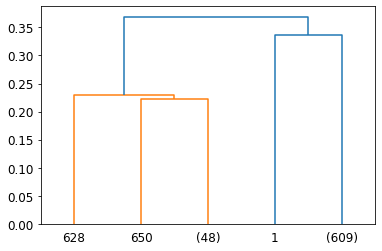

In [160]:
dendrogram(
    Zcomp,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

In [161]:
linkage_single = fcluster(Zcomp, 0.30, criterion='distance')

In [162]:
linkage_single

array([2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [163]:
model_name.append('linkage_single')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, linkage_single),roundoff))
silhouette_score(df, linkage_single)

0.31957253081491105

In [164]:
cscopy['linkage_single'] = linkage_single
df['linkage_single'] = linkage_single

In [165]:
cscopy['linkage_single'].value_counts(normalize=True)*100

2   92.2727
1    7.5758
3    0.1515
Name: linkage_single, dtype: float64

<b>Observation</b>
- Cluster 2 has ~92% of total customers
- Cluster 1 with ~0.1% of total customers
- Cluster 3 with ~7% of total customers

In [166]:
cscopy.groupby('linkage_single').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete,Linkage_Ward
linkage_single,,,,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<b>Observation</b>
- Cluster 1 with 50 customers
- Cluster 2 has 609 customers
- Cluster 3 with 1 customers

In [167]:
cscopy.groupby('linkage_single').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete,Linkage_Ward
linkage_single,,,,,,,,,,,,,,,,,,
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000
2,307.9869,55040.2315,25807.8818,4.3777,2.5550,1.9130,3.7800,0.3727,1.2874,1.1921,0.3727,1.2874,1.2939,1.2939,0.7258,2.6437,2.4039,1.7455
3,2.0000,38414.0000,50000.0000,3.0000,0.0000,10.0000,9.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000,2.0000,3.0000,3.0000


#### Box plot : Linkage - Single

Total_visits_bank         AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_visits_online    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total_calls_made        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TotalCreditLimit       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
linkage_single         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

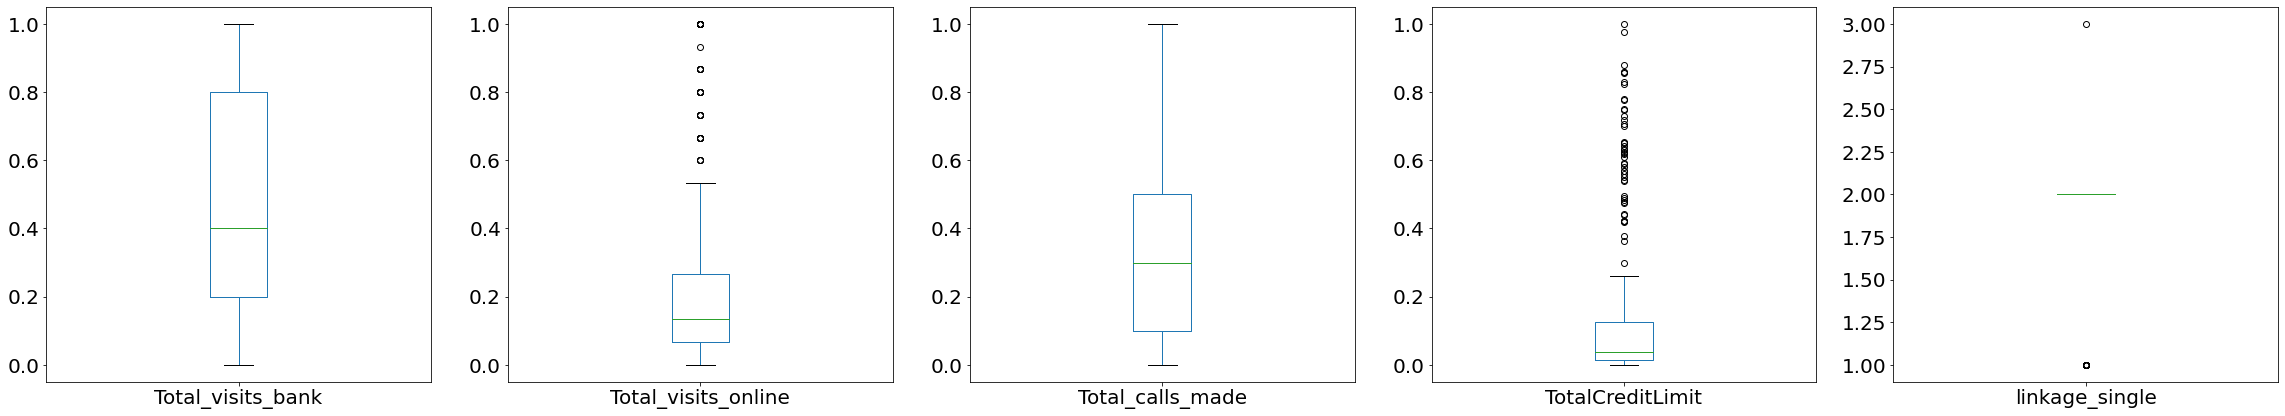

In [168]:
df.plot(by='linkage_single',kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))

<b>Observations</b>
- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank,  less bank visits and high online visits
- Cluster 2: 
    - Customers with lower Total credit limit 
    - More calls to bank, medium bank visits, medium online visits
- Cluster 3: 
    - Customers with medium credit limit ,medium number of credit cards
    - High bank visits , high online visits and high calls to bank

# Compare Models and Scores

## Compare the scores and score type

In [169]:
Allmodels = pd.DataFrame({"Model Name":model_name,"Score Type":score_name,"Score":score_value})
Allmodels.sort_values(['Score Type','Score',],ascending=[True,False])

,Model Name,Score Type,Score
9,Linkage_Avg,cophenetic correlation,0.8280
11,Linkage_Complete,cophenetic correlation,0.7830
13,Linkage_Ward,cophenetic correlation,0.7380
15,Linkage_single,cophenetic correlation,0.6340
1,PCA_KMeans_3,silhouettescore,0.8100
2,AgglomerativeClustering_3,silhouettescore,0.5320
5,Agg_linkage_avg_l2,silhouettescore,0.5320
10,Linkage_Avg,silhouettescore,0.5320
6,Agg_linkage_avg_l1,silhouettescore,0.5310
7,Agg_linkage_avg_manhattan,silhouettescore,0.5310


<b>Observation</b>
- Linkage_Avg has highest cophenetic correlation of 0.82 
- KMeans on PCA reduced data has the highest Silhouette Score of ~0.81 
- Linkage Single (from sklearn or scipy) is the bad model which silhouette score as 0.32

## Detail insights on all algorithms and their clusters

- K means compute faster with arge number of variables
- K means require prior knowledge of 'K' clusters where as its easy to determine number of clusters by hierarchical clustering
- K means can handle huge amount of data where as Hierarchical clustering works well with smaller dataset


<b>Observation on Clusters created by Agglomerative Clustering</b>

- Cluster 0: 
    - Customers with lower Total credit limit 
    - High calls to bank, medium bank visits, medium online visits
- Cluster 1: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and highest online visits
- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits



<b>Observation Agglomerative Clustering using Complete linkage</b>

- Cluster 0: 
    - Customers with lower Total credit limit
    - High calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and high online visits

- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and less online visits


<p><b>Observations Agglomerative Clustering using ward linkage</b></p>

- Cluster 0: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and less online visits

- Cluster 1: 
    - Customers with less Total credit limit
    - High calls to bank, medium bank visits, medium online visits

- Cluster 2: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and high online visits



<p><b>Observations Agglomerative Clustering using l2 and average linkage</b></p>

- Cluster 0: 
    - Customers with lower Total credit limit
    - High calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and high online visits

- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, high bank visits and less online visits



<b>Observations Agglomerative Clustering using l1 and average linkage</b>

- Cluster 0: 
    - Customers with lower Total credit limit
    - More calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank, less bank visits and High online visits

- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits



<b>Observations Agglomerative Clustering using Manhattan and average linkage</b>

- Cluster 0: 
    - Customers with lower Total credit limit
    - More calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank, less bank visits and High online visits

- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits


<p><b>Observations Agglomerative Clustering using cosine and average linkage</b></p>

- Cluster 0: 
    - Customers with lower Total credit limit 
    - More calls to bank, medium bank visits, medium online visits

- Cluster 1: 
    - Customers with higher Total credit limit 
    - Fewer calls made to bank, less bank visits and high online visits

- Cluster 2: 
    - Customers with medium credit limit 
    - Less calls made, more bank visits and less online visits


<b>Observation Hierachicial clustering with Linkage - Average</b>
- Cluster 1: 
    - Customers with High avg credit limit, High number of credit card
    - Less bank visits, HIgh online visits and fewer calls made to bank
- Cluster 2: 
    - Customers with low credit limit, fewer credit cards
    - Medium bank visits, medium online visits and High calls to bank
- Cluster 3: 
    - Customers with medium credit limit ,medium number of credit cards
    - High average bank visits , less online visits and medium calls to bank


<b>Observations Linkage - Complete</b>
- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank, very less bank visits and High online visits
- Cluster 2: 
    - Customers with medium credit limit
    - Less calls made, more bank visits and very less online visits
- Cluster 3: 
    - Customers with lower Total credit limit
    - More calls to bank, medium bank visits, medium online visits


<b>Observations Linkage - Ward</b>
- Cluster 1: 
    - Customers with medium credit limit
    - Few calls made, more bank visits and less online visits
- Cluster 2: 
    - Customers with higher Total credit limit
    - Less calls made to bank, less bank visits and high online visits
- Cluster 3: 
    - Customers with lower Total credit limit
    - more calls to bank, medium bank visits, medium online visits


<b>Observations Linkage - Single</b>
- Cluster 1: 
    - Customers with higher Total credit limit 
    - Less calls made to bank,  less bank visits and high online visits
- Cluster 2: 
    - Customers with lower Total credit limit 
    - More calls to bank, medium bank visits, medium online visits
- Cluster 3: 
    - Customers with medium credit limit ,medium number of credit cards
    - High bank visits , high online visits and high calls to bank


# Insights & Recommendation

## Insights

- 3 categories of customers are identified based on credit limit and their mode of communication with bank

- **High Credit Limit preference of online bank**
    - These customers prefer have high credit limit and prefer online banking rather visiting or calling bank
- **Medium Credit Limit preference of bank visits**
    - These customers likely make less calls to bank than low credit limit but often visits bank more than high credit limit customers
- **Low Credit Limit preference of calling bank**
    - These customers makes more calls to bank and also visits bank


## Recommendations

As we see there are three (3) categories/segments of customers with each segment having a preference for communication channel with bank, it is recommended that products are marketed to specific segment of customers through their preferred channel. Also, additional services can be provided based on how they connect with bank and also based on their spending pattern which can deduced from average credit limit.

- Customers with high credit limit tend to vist online. Hence they can be targeted for online campaigns, coupons and accordingly products and services can be offered to them
- Whereas customers with comparatively low credit limit make visits to bank more often, hence they can either be prompted with benefits of online banking or can be catered with in-bank offers/services and flyers
- Customers with low credit limits have less frequency on online platform, they can be marketed with benefits of online banking and/or make customer call center reps aware of promotions and offers so that they can target this segment of customers


Based on how bank wants to promote its products and services, a segment of customers can be targeted as we know their prefered mode of commmunication with bank